In [1]:
import numpy as np

In [32]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=10000, lr=0.0001, bias=True, verbose=False, C=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.C = C

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        X = np.array(X)
        y = np.array(y)
        X_val = np.array(X_val)
        y_val = np.array(y_val)
        
        n_features = X.shape[1]
        if self.bias == True:
            self.coef_ = np.random.random_sample(n_features+1)
        else:
            self.coef_ = np.random.random_sample(n_features)
        
        for iter in range(self.iter):
            pred = self.hypothesis(X)
            pred_val = self.hypothesis(X_val)
            error = pred - y
            self.coef_ = self._gradient_descent(X, error)
            self.loss[iter] = self.cost_(X, y, pred)
            self.val_loss[iter] = self.cost_(X_val, y_val, pred_val)
        
            if self.verbose:
                if iter % 100 == 0:
                    print("loss:{} val_loss:{}".format(self.cost_(X, y, pred), self.cost_(X_val, y_val, pred_val)))
                
                
                
    def cost_(self, X, y, pred):
        reg = self.C * np.sum(self.coef_[1:]**2) / (2*X.shape[0])
        return np.sum(-y.T.dot(np.log(pred+1e-10))-(1-y).T.dot(np.log(1-pred+1e-10)))/X.shape[0] + reg

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return self.threshold(X)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return self.hypothesis(X)
    
    def sigmoid(self, z):
        return 1 / ( 1 + np.exp(-z))
    
    def hypothesis(self, X):
        if self.bias == True:
            z = X.dot(self.coef_[1:].T)+self.coef_[0]
        else:
            z = X.dot(self.coef_.T)
            
        return self.sigmoid(z)

    def _gradient_descent(self, X, error):
        if self.bias == True:
            self.coef_[1:] -= self.lr * np.dot(error, X) + (self.C*(self.coef_[1:]))/(X.shape[0])
            self.coef_[0] -= self.lr * error.sum() / X.shape[0]
        else:
            self.coef_ -= self.lr * np.dot(error, X)
        return self.coef_
        
    def threshold(self, X):
        return np.where(self.hypothesis(X) >= 0.5, 1, 0)


# 【問題1】〜　【問題４】

上記にて

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [34]:
iris = load_iris()

In [35]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [36]:
df["target"] = iris.target

In [37]:
df_data = df[df["target"]>=1]

In [38]:
X = df_data.iloc[:, 0:4]
y = df_data["target"]
y = np.where(y==1, 0, 1)

In [39]:
from sklearn.model_selection import train_test_split
tr_x, val_x, tr_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.0001, bias=True, verbose=True, C=0.01)
lr = LogisticRegression()

In [41]:
slr.fit(tr_x, tr_y, val_x, val_y)
lr.fit(tr_x, tr_y)

loss:5.780855899986248 val_loss:6.017491944234373
loss:0.6805795733453315 val_loss:0.6818487439253417
loss:0.6525017775807602 val_loss:0.6552393173311419
loss:0.6269404348343561 val_loss:0.6310828834697151
loss:0.6036393286216373 val_loss:0.6091269256655589
loss:0.582365709685291 val_loss:0.5891440684368984
loss:0.5629097936496197 val_loss:0.5709293199958022
loss:0.5450836184400799 val_loss:0.5542988728670593
loss:0.5287195005677736 val_loss:0.5390885760133516
loss:0.5136682925412911 val_loss:0.5251522491105339


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_tr = slr.predict(tr_x)
pred_val = slr.predict(val_x)
pred_tr_lr = lr.predict(tr_x)
pred_val_lr = lr.predict(val_x)

正解率

In [43]:
print("ScratchLogisticRegression(tr):{:.3f}".format(np.sum(tr_y == pred_tr)/len(tr_y)))
print("ScratchLogisticRegression(val):{:.3f}".format(np.sum(val_y == pred_val)/len(val_y)))
print("LogisticRegression(tr):{:.3f}".format(np.sum(tr_y == pred_tr_lr)/len(tr_y)))
print("LogisticRegression(val):{:.3f}".format(np.sum(val_y == pred_val_lr)/len(val_y)))

ScratchLogisticRegression(tr):0.912
ScratchLogisticRegression(val):0.850
LogisticRegression(tr):0.963
LogisticRegression(val):0.900


# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

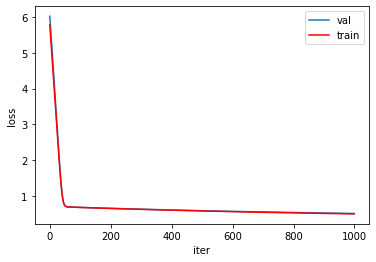

In [44]:
import matplotlib.pyplot as plt
plt.plot(range(0,slr.iter), slr.val_loss, label="val")
plt.plot(range(0,slr.iter), slr.loss, color='r', label="train")
plt.legend()
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

# 【問題7】決定領域の可視化
決定領域を可視化してください。

In [45]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [46]:
slr1 = ScratchLogisticRegression()
x_t = tr_x[["sepal length (cm)", "petal length (cm)"]]
y_t = tr_y
x_v = val_x[["sepal length (cm)", "petal length (cm)"]]
y_v = val_y

In [47]:
slr1.fit(x_t, y_t, x_v, y_v)

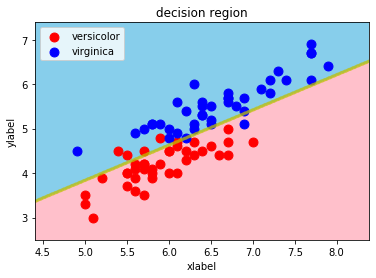

In [48]:
x_t = np.array(x_t)
y_t = np.array(y_t)
decision_region(x_t, y_t, slr1)

# 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
index = ['bias', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [51]:
df = pd.DataFrame({"feature_name":index,
              "coefficient":slr.coef_})

In [52]:
df.to_pickle('coef.pkl')

In [53]:
pd.read_pickle('coef.pkl')

,feature_name,coefficient
0,bias,0.967387
1,sepal length (cm),-0.722159
2,sepal width (cm),-0.529734
3,petal length (cm),0.897518
4,petal width (cm),0.502730
